In [18]:
import argparse
import logging
import os
import sys

import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
from torch import optim
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader, random_split

sys.path.append("..")
sys.path.append("../scripts/")
import superlayer.utils

from scripts import eval_net, train_net, get_args

from superlayer.models import SUnet
from superlayer.utils import BrainD, dice_coeff, one_hot, plot_img_array, plot_side_by_side

In [19]:
net1_W = np.load("/home/vib9/src/SL-Net/superlayer/models/superblocks/SLN_64.npy")
net2_W = np.load("/home/vib9/src/SL-Net/superlayer/models/superblocks/SLN_128.npy")
net3_W = np.load("/home/vib9/src/SL-Net/superlayer/models/superblocks/SLN_200.npy")
net4_W = np.load("/home/vib9/src/SL-Net/superlayer/models/superblocks/SLN_256.npy")

In [20]:
dir_img = '/home/gid-dalcaav/projects/neuron/data/t1_mix/proc/resize256-crop_x32-slice100/train/vols/'
dir_mask = '/home/gid-dalcaav/projects/neuron/data/t1_mix/proc/resize256-crop_x32-slice100/train/asegs/'

dir_train = '/home/vib9/src/SL-Net/jupyter/partitions/train.txt'
dir_val = '/home/vib9/src/SL-Net/jupyter/partitions/val.txt'

dir_checkpoint_1 = 'checkpoints_1/'
dir_checkpoint_2 = 'checkpoints_2/'

In [21]:
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')
args = get_args()
device = torch.device('cuda')
logging.info(f'Using device {device}')

INFO: Using device cuda


In [22]:
target_label_numbers = [0,2,3,4,10,16,17,28,31,41,42,43,49,53,63]
val_percent = 0.1
batch_size = args.batchsize
lr = args.lr
img_scale = args.scale
writer = SummaryWriter(comment=f'LR_{lr}_BS_{batch_size}_SCALE_{img_scale}')

In [6]:
enc_nf = [32, 32, 32, 32]
dec_nf = [32, 32, 32, 32]
net1 = SUnet(input_ch=1, out_ch=15, use_bn=True, enc_nf=enc_nf, dec_nf=dec_nf, ignore_last=False, W=net1_W)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net1.to(device=device)
train_scores1, val_scores1, train_var_1, val_var_1 = train_net(net=net1,
                                                                epochs=8,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          8
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  52%|█████▏    | 477/916 [00:19<00:18, 23.20batch/s]


Validation round:  99%|█████████▉| 909/916 [00:36<00:00, 25.39batch/s]
                                                                      INFO: Validation Dice Loss: 0.1950743040923989
Validation round:  44%|████▍     | 401/916 [00:15<00:19, 25.97batch/s]


Validation round: 100%|█████████▉| 913/916 [00:35<00:00, 27.27batch/s]
                                                                      INFO: Validation Dice Loss: 0.14005793643277545
Validation round:   9%|▊         | 79/916 [00:03<00:37, 22.35batch/s]


Validation round:  99%|█████████▉| 911/916 [00:36<00:00, 25.92batch/s]
                                                                      INFO: Validation Dice Loss: 0.12033743882250839
Validation round:   2%|▏         | 17/916 [00:01<05:33,  2.70batch/s]


Validation round:  80%|███████▉  | 729/916 [00:28<00:07, 25.78batch/s]


Validation round: 100%|█████████▉| 913/916 [00:35<00:00, 27.27batch/s]
                                                                      INFO: Validation Dice Loss: 0.11435854896968109
Validation round:  65%|██████▌   | 596/916 [00:23<00:12, 25.91batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 25.64batch/s]
                                                                      INFO: Validation Dice Loss: 0.10717686168101156
Epoch 1/8: 100%|██████████| 7329/7329 [03:36<00:00, 33.86img/s, loss (batch)=0.331] 
INFO: Checkpoint 1 saved !
Validation round:  32%|███▏      | 293/916 [00:11<00:25, 24.28batch/s]


Validation round: 100%|█████████▉| 914/916 [00:35<00:00, 27.60batch/s]
                                                                      INFO: Validation Dice Loss: 0.10508795566531508
Validation round:   4%|▍         | 36/916 [00:01<01:23, 10.59batch/s]


Validation round:  70%|██████▉   | 639/916 [00:25<00:10, 26.07batch/s]


Validation round:  99%|█████████▉| 911/916 [00:35<00:00, 27.24batch/s]
                                                                      INFO: Validation Dice Loss: 0.10303989298413935
Validation round:  56%|█████▌    | 513/916 [00:20<00:15, 25.49batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 25.79batch/s]
                                                                      INFO: Validation Dice Loss: 0.10119015878009484
Validation round:  43%|████▎     | 394/916 [00:15<00:19, 26.13batch/s]


Validation round: 100%|█████████▉| 914/916 [00:35<00:00, 26.78batch/s]
                                                                      INFO: Validation Dice Loss: 0.09965050248957878
Validation round:  34%|███▎      | 307/916 [00:12<00:23, 25.69batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 25.66batch/s]
                                                                      INFO: Validation Dice Loss: 0.09847761641000295
Epoch 2/8: 100%|██████████| 7329/7329 [03:36<00:00, 33.90img/s, loss (batch)=0.22]  
INFO: Checkpoint 2 saved !
Validation round:  16%|█▌        | 147/916 [00:06<00:31, 24.38batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 26.07batch/s]
                                                                      INFO: Validation Dice Loss: 0.09595389623504018
Validation round:   6%|▌         | 53/916 [00:02<00:57, 14.89batch/s]


Validation round:  58%|█████▊    | 529/916 [00:20<00:16, 23.87batch/s]


Validation round: 100%|█████████▉| 913/916 [00:35<00:00, 23.75batch/s]
                                                                      INFO: Validation Dice Loss: 0.0937890179422745
Validation round:  17%|█▋        | 154/916 [00:06<00:28, 26.43batch/s]


Validation round:  68%|██████▊   | 622/916 [00:24<00:13, 21.28batch/s]


Validation round:  99%|█████████▉| 910/916 [00:36<00:00, 24.43batch/s]
                                                                      INFO: Validation Dice Loss: 0.09104921985986972
Validation round:  46%|████▋     | 425/916 [00:17<00:18, 26.64batch/s]


Validation round: 100%|█████████▉| 913/916 [00:35<00:00, 26.19batch/s]
                                                                      INFO: Validation Dice Loss: 0.09038511056078834
Epoch 3/8:  99%|█████████▉| 7288/7329 [03:10<00:00, 192.44img/s, loss (batch)=0.203]


Validation round:  99%|█████████▉| 909/916 [00:35<00:00, 26.43batch/s]
                                                                      INFO: Validation Dice Loss: 0.08972259505151661
Epoch 3/8: 100%|██████████| 7329/7329 [03:36<00:00, 33.90img/s, loss (batch)=0.185] 
INFO: Checkpoint 3 saved !
Validation round:   4%|▎         | 33/916 [00:01<01:46,  8.29batch/s]


Validation round:  67%|██████▋   | 617/916 [00:24<00:11, 24.94batch/s]


Validation round:  99%|█████████▉| 909/916 [00:35<00:00, 25.07batch/s]
                                                                      INFO: Validation Dice Loss: 0.08818090063678385
Validation round:  37%|███▋      | 336/916 [00:13<00:21, 26.42batch/s]


Validation round: 100%|█████████▉| 912/916 [00:35<00:00, 26.84batch/s]
                                                                      INFO: Validation Dice Loss: 0.08885744863950269
Validation round:  22%|██▏       | 201/916 [00:08<00:28, 25.40batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 26.26batch/s]
                                                                      INFO: Validation Dice Loss: 0.08736465892482012
Validation round:   9%|▊         | 78/916 [00:03<00:32, 25.50batch/s]


Validation round:  66%|██████▌   | 605/916 [00:23<00:11, 26.33batch/s]


Validation round: 100%|█████████▉| 913/916 [00:35<00:00, 30.72batch/s]
                                                                      INFO: Validation Dice Loss: 0.08812172236693738
Validation round:  26%|██▋       | 241/916 [00:10<00:27, 24.73batch/s]


Validation round: 100%|█████████▉| 913/916 [00:35<00:00, 27.61batch/s]
                                                                      INFO: Validation Dice Loss: 0.09272355700163862
Epoch 4/8: 100%|██████████| 7329/7329 [03:35<00:00, 34.05img/s, loss (batch)=0.353] 
INFO: Checkpoint 4 saved !
Validation round:  17%|█▋        | 153/916 [00:06<00:30, 25.13batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 26.47batch/s]
                                                                      INFO: Validation Dice Loss: 0.08557164416075014
Validation round:   8%|▊         | 74/916 [00:03<00:45, 18.45batch/s]


Validation round:  95%|█████████▌| 874/916 [00:33<00:01, 25.82batch/s]


Validation round: 100%|█████████▉| 914/916 [00:35<00:00, 27.07batch/s]
                                                                      INFO: Validation Dice Loss: 0.0866620360536086
Validation round:  86%|████████▌ | 786/916 [00:31<00:04, 26.52batch/s]


Validation round: 100%|█████████▉| 914/916 [00:35<00:00, 27.17batch/s]
                                                                      INFO: Validation Dice Loss: 0.08591865308940672
Validation round:  59%|█████▊    | 538/916 [00:21<00:14, 25.97batch/s]


Validation round: 100%|█████████▉| 914/916 [00:35<00:00, 26.61batch/s]
                                                                      INFO: Validation Dice Loss: 0.08668232241474645
Validation round:  47%|████▋     | 435/916 [00:17<00:18, 25.93batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 25.92batch/s]
                                                                      INFO: Validation Dice Loss: 0.08478839881718159
Epoch 5/8: 100%|██████████| 7329/7329 [03:35<00:00, 33.97img/s, loss (batch)=0.14]  
INFO: Checkpoint 5 saved !
Validation round:  39%|███▊      | 353/916 [00:14<00:21, 26.21batch/s]


Validation round: 100%|█████████▉| 913/916 [00:35<00:00, 26.25batch/s]
                                                                      INFO: Validation Dice Loss: 0.08468618796219211
Validation round:  24%|██▍       | 218/916 [00:09<00:27, 25.66batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 26.87batch/s]
                                                                      INFO: Validation Dice Loss: 0.08462251299853929
Validation round:  11%|█▏        | 104/916 [00:04<00:28, 28.82batch/s]


Validation round:  90%|█████████ | 828/916 [00:32<00:03, 25.14batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 26.26batch/s]
                                                                      INFO: Validation Dice Loss: 0.0849516141720474
Validation round:  77%|███████▋  | 701/916 [00:28<00:08, 26.75batch/s]


Validation round:  99%|█████████▉| 909/916 [00:36<00:00, 26.13batch/s]
                                                                      INFO: Validation Dice Loss: 0.08469801275750956
Validation round:  68%|██████▊   | 625/916 [00:24<00:11, 24.73batch/s]


Validation round: 100%|█████████▉| 913/916 [00:35<00:00, 25.96batch/s]
                                                                      INFO: Validation Dice Loss: 0.08468208764578057
Epoch 6/8: 100%|██████████| 7329/7329 [03:35<00:00, 33.96img/s, loss (batch)=0.127] 
INFO: Checkpoint 6 saved !
Validation round:  34%|███▎      | 307/916 [00:12<00:25, 23.47batch/s]


Validation round: 100%|█████████▉| 914/916 [00:35<00:00, 28.57batch/s]
                                                                      INFO: Validation Dice Loss: 0.0844671467408603
Validation round:  11%|█         | 97/916 [00:04<00:39, 20.70batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 26.60batch/s]
                                                                      INFO: Validation Dice Loss: 0.08459703320856958
Validation round:   3%|▎         | 25/916 [00:01<03:03,  4.85batch/s]


Validation round:  66%|██████▋   | 608/916 [00:24<00:12, 25.39batch/s]


Validation round:  99%|█████████▉| 909/916 [00:35<00:00, 26.14batch/s]
                                                                      INFO: Validation Dice Loss: 0.08457363548172094
Validation round:  35%|███▌      | 322/916 [00:13<00:22, 25.85batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 26.36batch/s]
                                                                      INFO: Validation Dice Loss: 0.08442021038497119
Validation round:  22%|██▏       | 197/916 [00:08<00:31, 23.12batch/s]


Validation round:  99%|█████████▉| 909/916 [00:35<00:00, 27.81batch/s]
                                                                      INFO: Validation Dice Loss: 0.08443560520406633
Epoch 7/8: 100%|██████████| 7329/7329 [03:35<00:00, 34.00img/s, loss (batch)=0.229] 
INFO: Checkpoint 7 saved !
Validation round:   6%|▋         | 58/916 [00:02<00:35, 24.03batch/s]


Validation round:  97%|█████████▋| 893/916 [00:35<00:00, 24.02batch/s]


Validation round:  99%|█████████▉| 909/916 [00:35<00:00, 24.70batch/s]
                                                                      INFO: Validation Dice Loss: 0.08462740018898743
Validation round:  72%|███████▏  | 664/916 [00:26<00:10, 25.04batch/s]


Validation round: 100%|█████████▉| 915/916 [00:35<00:00, 26.34batch/s]
                                                                      INFO: Validation Dice Loss: 0.0843930496675609
Validation round:  61%|██████▏   | 562/916 [00:22<00:13, 25.53batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 25.65batch/s]
                                                                      INFO: Validation Dice Loss: 0.08452075591318993
Validation round:  51%|█████     | 463/916 [00:18<00:17, 25.38batch/s]


Validation round: 100%|██████████| 916/916 [00:35<00:00, 26.91batch/s]
                                                                      INFO: Validation Dice Loss: 0.08461971966525353
Validation round:  17%|█▋        | 159/916 [00:06<00:32, 23.51batch/s]


Validation round:  99%|█████████▉| 911/916 [00:35<00:00, 26.37batch/s]
                                                                      INFO: Validation Dice Loss: 0.08449809826650213
Epoch 8/8: 100%|██████████| 7329/7329 [03:34<00:00, 34.14img/s, loss (batch)=0.102] 
INFO: Checkpoint 8 saved !


In [7]:
enc_nf = [64, 64, 64, 64]
dec_nf = [64, 64, 64, 64]
net2 = SUnet(input_ch=1, out_ch=15, use_bn=True, enc_nf=enc_nf, dec_nf=dec_nf, ignore_last=False, W=net2_W)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net2.to(device=device)
train_scores2, val_scores2, train_var_2, val_var_2 = train_net(net=net2,
                                                                epochs=8,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          8
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  74%|███████▍  | 676/916 [00:27<00:09, 25.76batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 25.73batch/s]
                                                                      INFO: Validation Dice Loss: 0.07533282313219325
Validation round:  42%|████▏     | 389/916 [00:15<00:23, 22.62batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 25.53batch/s]
                                                                      INFO: Validation Dice Loss: 0.07708850268713772
Validation round:  17%|█▋        | 155/916 [00:06<00:32, 23.25batch/s]


Validation round:  88%|████████▊ | 809/916 [00:32<00:04, 25.42batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 23.54batch/s]
                                                                      INFO: Validation Dice Loss: 0.07153325823977524
Validation round:  50%|████▉     | 457/916 [00:18<00:14, 30.95batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 22.14batch/s]
                                                                      INFO: Validation Dice Loss: 0.0719777097413113
Validation round:  35%|███▌      | 323/916 [00:13<00:22, 26.31batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 25.67batch/s]
                                                                      INFO: Validation Dice Loss: 0.07154873911470305
Epoch 1/8: 100%|██████████| 7329/7329 [03:38<00:00, 33.61img/s, loss (batch)=0.203] 
INFO: Checkpoint 1 saved !
Validation round:  12%|█▏        | 106/916 [00:04<00:32, 25.29batch/s]


Validation round:  83%|████████▎ | 756/916 [00:30<00:06, 24.20batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 26.51batch/s]
                                                                      INFO: Validation Dice Loss: 0.06854068976725293
Validation round:  53%|█████▎    | 489/916 [00:19<00:16, 25.24batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 26.17batch/s]
                                                                      INFO: Validation Dice Loss: 0.07216515450628563
Validation round:  33%|███▎      | 302/916 [00:12<00:26, 23.44batch/s]


Validation round:  99%|█████████▉| 910/916 [00:36<00:00, 26.15batch/s]
                                                                      INFO: Validation Dice Loss: 0.07246832700047691
Validation round:  14%|█▍        | 131/916 [00:05<00:33, 23.18batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 25.36batch/s]
                                                                      INFO: Validation Dice Loss: 0.06998482210699908
Validation round:   1%|          | 9/916 [00:00<07:23,  2.04batch/s]


Validation round:  93%|█████████▎| 849/916 [00:33<00:02, 25.86batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 25.21batch/s]
                                                                      INFO: Validation Dice Loss: 0.06537521693156015
Epoch 2/8: 100%|██████████| 7329/7329 [03:38<00:00, 33.49img/s, loss (batch)=0.204] 
INFO: Checkpoint 2 saved !
Validation round:  79%|███████▊  | 721/916 [00:29<00:08, 22.79batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 25.59batch/s]
                                                                      INFO: Validation Dice Loss: 0.0650366805656508
Validation round:  60%|██████    | 553/916 [00:22<00:13, 26.07batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 25.63batch/s]
                                                                      INFO: Validation Dice Loss: 0.0651566711982395
Validation round:  38%|███▊      | 347/916 [00:14<00:23, 24.53batch/s]


Validation round:  88%|████████▊ | 810/916 [00:32<00:04, 23.66batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 26.19batch/s]
                                                                      INFO: Validation Dice Loss: 0.06580068881920331
Validation round:  59%|█████▉    | 541/916 [00:21<00:14, 25.90batch/s]


Validation round:  99%|█████████▉| 909/916 [00:36<00:00, 25.97batch/s]
                                                                      INFO: Validation Dice Loss: 0.06493269257637871
Validation round:  36%|███▋      | 333/916 [00:13<00:22, 26.40batch/s]


Validation round:  99%|█████████▉| 909/916 [00:35<00:00, 22.79batch/s]
                                                                      INFO: Validation Dice Loss: 0.06509305083693115
Epoch 3/8: 100%|██████████| 7329/7329 [03:38<00:00, 33.52img/s, loss (batch)=0.159] 
INFO: Checkpoint 3 saved !
Validation round:  10%|▉         | 89/916 [00:04<00:36, 22.58batch/s]


Validation round:  62%|██████▏   | 569/916 [00:22<00:13, 25.24batch/s]


Validation round: 100%|██████████| 916/916 [00:35<00:00, 27.34batch/s]
                                                                      INFO: Validation Dice Loss: 0.06500132306271506
Validation round:  12%|█▏        | 113/916 [00:05<00:32, 24.79batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 26.40batch/s]
                                                                      INFO: Validation Dice Loss: 0.05342364965177519


Validation round:  80%|████████  | 735/916 [00:29<00:07, 25.33batch/s]


Validation round:  99%|█████████▉| 911/916 [00:35<00:00, 24.75batch/s]
                                                                      INFO: Validation Dice Loss: 0.051017083634325514
Validation round:  62%|██████▏   | 569/916 [00:23<00:13, 25.77batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 26.18batch/s]
                                                                      INFO: Validation Dice Loss: 0.05072407051920891
Validation round:  48%|████▊     | 444/916 [00:18<00:18, 24.84batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 26.26batch/s]
                                                                      INFO: Validation Dice Loss: 0.050396417540103586
Epoch 4/8: 100%|██████████| 7329/7329 [03:36<00:00, 33.80img/s, loss (batch)=0.0792]
INFO: Checkpoint 4 saved !
Validation round:  33%|███▎      | 305/916 [00:12<00:24, 25.37batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 23.70batch/s]
                                                                      INFO: Validation Dice Loss: 0.05095289381603226
Validation round:  11%|█▏        | 105/916 [00:04<00:32, 24.58batch/s]


Validation round:  99%|█████████▉| 910/916 [00:35<00:00, 25.95batch/s]
                                                                      INFO: Validation Dice Loss: 0.05067475454060271
Validation round:   1%|          | 10/916 [00:01<05:50,  2.58batch/s]


Validation round:  77%|███████▋  | 705/916 [00:27<00:09, 21.20batch/s]


Validation round: 100%|█████████▉| 915/916 [00:35<00:00, 24.50batch/s]
                                                                      INFO: Validation Dice Loss: 0.050248199260456074
Validation round:  32%|███▏      | 296/916 [00:11<00:28, 21.80batch/s]


Validation round: 100%|█████████▉| 912/916 [00:36<00:00, 26.12batch/s]
                                                                      INFO: Validation Dice Loss: 0.05053619377510256
Validation round:   9%|▉         | 87/916 [00:03<00:33, 24.89batch/s]


Validation round:  96%|█████████▌| 879/916 [00:34<00:01, 25.55batch/s]


Validation round:  99%|█████████▉| 911/916 [00:36<00:00, 25.88batch/s]
                                                                      INFO: Validation Dice Loss: 0.05035412048018135
Epoch 5/8: 100%|██████████| 7329/7329 [03:36<00:00, 33.88img/s, loss (batch)=0.098] 
INFO: Checkpoint 5 saved !
Validation round:  58%|█████▊    | 532/916 [00:22<00:15, 25.16batch/s]


Validation round: 100%|██████████| 916/916 [00:39<00:00, 25.78batch/s]
                                                                      INFO: Validation Dice Loss: 0.050203587493847034
Validation round:  44%|████▍     | 403/916 [00:16<00:22, 22.35batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 26.59batch/s]
                                                                      INFO: Validation Dice Loss: 0.05030710472192566
Validation round:  28%|██▊       | 255/916 [00:10<00:25, 26.43batch/s]


Validation round:  83%|████████▎ | 764/916 [00:30<00:05, 26.25batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 24.19batch/s]
                                                                      INFO: Validation Dice Loss: 0.05057802531201246
Validation round:  45%|████▌     | 415/916 [00:16<00:19, 25.59batch/s]


Validation round:  99%|█████████▉| 911/916 [00:36<00:00, 25.39batch/s]
                                                                      INFO: Validation Dice Loss: 0.05027742356094471
Validation round:  30%|███       | 275/916 [00:11<00:25, 24.86batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 26.25batch/s]
                                                                      INFO: Validation Dice Loss: 0.05020613305465883
Epoch 6/8: 100%|██████████| 7329/7329 [03:43<00:00, 32.86img/s, loss (batch)=0.102] 
INFO: Checkpoint 6 saved !
Validation round:  13%|█▎        | 115/916 [00:05<00:34, 23.23batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 26.04batch/s]
                                                                      INFO: Validation Dice Loss: 0.0502390038612498
Validation round:   2%|▏         | 14/916 [00:01<03:58,  3.78batch/s]


Validation round:  52%|█████▏    | 475/916 [00:19<00:19, 22.41batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 22.51batch/s]
                                                                      INFO: Validation Dice Loss: 0.05021518136183507
Validation round:  12%|█▏        | 113/916 [00:05<00:37, 21.42batch/s]


Validation round:  89%|████████▉ | 817/916 [00:32<00:04, 24.67batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 27.64batch/s]
                                                                      INFO: Validation Dice Loss: 0.05016046436300184
Validation round:  65%|██████▍   | 591/916 [00:23<00:13, 24.89batch/s]


Validation round:  99%|█████████▉| 911/916 [00:36<00:00, 25.71batch/s]
                                                                      INFO: Validation Dice Loss: 0.05016762404560262
Validation round:  30%|███       | 278/916 [00:11<00:28, 22.72batch/s]


Validation round: 100%|█████████▉| 912/916 [00:36<00:00, 25.49batch/s]
                                                                      INFO: Validation Dice Loss: 0.0501433137202367
Epoch 7/8: 100%|██████████| 7329/7329 [03:38<00:00, 33.59img/s, loss (batch)=0.102]  
INFO: Checkpoint 7 saved !
Validation round:  10%|█         | 92/916 [00:04<00:36, 22.28batch/s]


Validation round:  97%|█████████▋| 884/916 [00:35<00:01, 25.93batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 23.45batch/s]
                                                                      INFO: Validation Dice Loss: 0.05012832542954574
Validation round:  81%|████████▏ | 746/916 [00:29<00:07, 21.71batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 25.63batch/s]
                                                                      INFO: Validation Dice Loss: 0.05011888298990945
Validation round:  67%|██████▋   | 617/916 [00:24<00:11, 25.61batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 24.77batch/s]
                                                                      INFO: Validation Dice Loss: 0.0501362049878945
Validation round:  47%|████▋     | 430/916 [00:17<00:18, 26.09batch/s]


Validation round:  99%|█████████▉| 910/916 [00:35<00:00, 22.86batch/s]
                                                                      INFO: Validation Dice Loss: 0.050122460643211825
Validation round:  33%|███▎      | 298/916 [00:12<00:24, 25.02batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 25.50batch/s]
                                                                      INFO: Validation Dice Loss: 0.050148269486934856
Epoch 8/8: 100%|██████████| 7329/7329 [03:37<00:00, 33.70img/s, loss (batch)=0.0831] 
INFO: Checkpoint 8 saved !


In [8]:
enc_nf = [100, 100, 100, 100]
dec_nf = [100, 100, 100, 100]
net3 = SUnet(input_ch=1, out_ch=15, use_bn=True, enc_nf=enc_nf, dec_nf=dec_nf, ignore_last=False, W=net3_W)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net3.to(device=device)
train_scores3, val_scores3, train_var_3, val_var_3 = train_net(net=net3,
                                                                epochs=8,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          8
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  49%|████▉     | 453/916 [00:18<00:20, 22.28batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 28.69batch/s]
                                                                      INFO: Validation Dice Loss: 0.06464844842046889
Validation round:   1%|▏         | 13/916 [00:01<04:22,  3.44batch/s]


Validation round:  54%|█████▍    | 498/916 [00:20<00:17, 23.40batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 26.79batch/s]
                                                                      INFO: Validation Dice Loss: 0.05343388139746075
Validation round:   1%|          | 9/916 [00:01<05:56,  2.54batch/s]


Validation round:  50%|█████     | 460/916 [00:18<00:20, 22.72batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 23.77batch/s]
                                                                      INFO: Validation Dice Loss: 0.05004865480139526
Validation round:   2%|▏         | 14/916 [00:01<04:09,  3.62batch/s]


Validation round:  55%|█████▍    | 501/916 [00:19<00:18, 23.01batch/s]


Validation round: 100%|█████████▉| 912/916 [00:35<00:00, 25.57batch/s]
                                                                      INFO: Validation Dice Loss: 0.04977569326465567
Validation round:   6%|▌         | 55/916 [00:02<00:36, 23.68batch/s]


Validation round:  56%|█████▌    | 510/916 [00:20<00:14, 27.27batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 26.11batch/s]
                                                                      INFO: Validation Dice Loss: 0.04708322288069923
Epoch 1/8: 100%|██████████| 7329/7329 [03:52<00:00, 31.52img/s, loss (batch)=0.0825] 
INFO: Checkpoint 1 saved !
Validation round:   3%|▎         | 25/916 [00:01<01:52,  7.95batch/s]


Validation round:  57%|█████▋    | 522/916 [00:21<00:15, 25.81batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 28.31batch/s]
                                                                      INFO: Validation Dice Loss: 0.04667098647772485
Validation round:   9%|▉         | 87/916 [00:04<00:32, 25.62batch/s]


Validation round:  60%|█████▉    | 548/916 [00:22<00:13, 27.81batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 26.20batch/s]
                                                                      INFO: Validation Dice Loss: 0.046423310267547854
Validation round:   8%|▊         | 71/916 [00:03<00:34, 24.73batch/s]


Validation round:  57%|█████▋    | 523/916 [00:21<00:17, 22.94batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 28.03batch/s]
                                                                      INFO: Validation Dice Loss: 0.04956474821347597
Validation round:   7%|▋         | 62/916 [00:03<00:40, 21.27batch/s]


Validation round:  59%|█████▊    | 538/916 [00:21<00:14, 26.13batch/s]


Validation round: 100%|█████████▉| 912/916 [00:36<00:00, 22.73batch/s]
                                                                      INFO: Validation Dice Loss: 0.045683704251545484
Validation round:  12%|█▏        | 107/916 [00:04<00:32, 24.60batch/s]


Validation round:  63%|██████▎   | 581/916 [00:22<00:13, 24.01batch/s]


Validation round: 100%|█████████▉| 912/916 [00:35<00:00, 25.56batch/s]
                                                                      INFO: Validation Dice Loss: 0.04598342014810144
Epoch 2/8: 100%|██████████| 7329/7329 [03:53<00:00, 31.34img/s, loss (batch)=0.114] 
INFO: Checkpoint 2 saved !
Validation round:  12%|█▏        | 113/916 [00:05<00:29, 27.07batch/s]


Validation round:  67%|██████▋   | 614/916 [00:25<00:13, 23.12batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 23.48batch/s]
                                                                      INFO: Validation Dice Loss: 0.04500699635416139
Validation round:  18%|█▊        | 169/916 [00:07<00:28, 26.09batch/s]


Validation round:  73%|███████▎  | 670/916 [00:27<00:10, 23.08batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 26.40batch/s]
                                                                      INFO: Validation Dice Loss: 0.045219703215503795
Validation round:  26%|██▌       | 236/916 [00:10<00:28, 24.04batch/s]


Validation round:  81%|████████  | 739/916 [00:30<00:07, 22.45batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 24.18batch/s]
                                                                      INFO: Validation Dice Loss: 0.04488292774876913
Validation round:  32%|███▏      | 294/916 [00:12<00:23, 26.43batch/s]


Validation round:  85%|████████▌ | 782/916 [00:31<00:04, 28.22batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 26.67batch/s]
                                                                      INFO: Validation Dice Loss: 0.04654957935637001
Validation round:  30%|███       | 279/916 [00:11<00:23, 26.86batch/s]


Validation round:  80%|███████▉  | 729/916 [00:28<00:07, 26.46batch/s]


Validation round: 100%|█████████▉| 915/916 [00:35<00:00, 24.50batch/s]
                                                                      INFO: Validation Dice Loss: 0.04460191654293558
Epoch 3/8: 100%|██████████| 7329/7329 [03:54<00:00, 31.32img/s, loss (batch)=0.142]  
INFO: Checkpoint 3 saved !
Validation round:  30%|██▉       | 273/916 [00:11<00:24, 26.09batch/s]


Validation round:  84%|████████▍ | 774/916 [00:30<00:05, 24.06batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 27.99batch/s]
                                                                      INFO: Validation Dice Loss: 0.045292391071673564
Validation round:  35%|███▌      | 325/916 [00:13<00:27, 21.81batch/s]


Validation round:  90%|█████████ | 828/916 [00:33<00:03, 27.17batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 26.73batch/s]
                                                                      INFO: Validation Dice Loss: 0.04610257170378641
Validation round:  39%|███▉      | 356/916 [00:14<00:23, 23.83batch/s]


Validation round:  91%|█████████ | 832/916 [00:32<00:03, 26.52batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 24.92batch/s]
                                                                      INFO: Validation Dice Loss: 0.04455459400946397
Validation round:  40%|████      | 369/916 [00:15<00:20, 26.05batch/s]


Validation round:  92%|█████████▏| 839/916 [00:33<00:02, 27.70batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 25.92batch/s]
                                                                      INFO: Validation Dice Loss: 0.044752521773873455
Validation round:  42%|████▏     | 381/916 [00:15<00:19, 27.32batch/s]


Validation round:  94%|█████████▍| 865/916 [00:33<00:01, 26.30batch/s]


Validation round: 100%|██████████| 916/916 [00:35<00:00, 24.57batch/s]
                                                                      INFO: Validation Dice Loss: 0.04449679253533417
Epoch 4/8: 100%|██████████| 7329/7329 [03:53<00:00, 31.44img/s, loss (batch)=0.0808]
INFO: Checkpoint 4 saved !
Validation round:  44%|████▍     | 402/916 [00:16<00:22, 23.17batch/s]


Validation round:  98%|█████████▊| 902/916 [00:36<00:00, 25.78batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 23.20batch/s]
                                                                      INFO: Validation Dice Loss: 0.04474834896070989
Validation round:  47%|████▋     | 433/916 [00:17<00:17, 27.90batch/s]


Validation round:  97%|█████████▋| 884/916 [00:35<00:01, 23.73batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 23.55batch/s]
                                                                      INFO: Validation Dice Loss: 0.044805655971690034
Validation round:  48%|████▊     | 436/916 [00:17<00:20, 23.39batch/s]


Validation round:  98%|█████████▊| 895/916 [00:35<00:00, 27.35batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 24.43batch/s]
                                                                      INFO: Validation Dice Loss: 0.04443959430608427
Validation round:  49%|████▉     | 452/916 [00:18<00:20, 22.19batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 27.70batch/s]
                                                                      INFO: Validation Dice Loss: 0.04471233334213365
Validation round:   2%|▏         | 17/916 [00:01<03:15,  4.60batch/s]


Validation round:  51%|█████     | 465/916 [00:18<00:17, 25.31batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 23.57batch/s]
                                                                      INFO: Validation Dice Loss: 0.045272107695648246
Epoch 5/8: 100%|██████████| 7329/7329 [03:54<00:00, 31.21img/s, loss (batch)=0.158]  
INFO: Checkpoint 5 saved !
Validation round:   2%|▏         | 17/916 [00:01<03:10,  4.73batch/s]


Validation round:  55%|█████▌    | 505/916 [00:20<00:14, 27.45batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 26.92batch/s]
                                                                      INFO: Validation Dice Loss: 0.04479893148921463
Validation round:   7%|▋         | 65/916 [00:03<00:34, 24.75batch/s]


Validation round:  56%|█████▌    | 514/916 [00:21<00:15, 25.48batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 25.53batch/s]
                                                                      INFO: Validation Dice Loss: 0.043860461286322
Validation round:   5%|▌         | 50/916 [00:02<00:40, 21.57batch/s]


Validation round:  58%|█████▊    | 532/916 [00:21<00:16, 23.41batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 22.32batch/s]
                                                                      INFO: Validation Dice Loss: 0.043641506226562515
Validation round:  10%|▉         | 90/916 [00:04<00:32, 25.33batch/s]


Validation round:  65%|██████▍   | 592/916 [00:23<00:13, 23.69batch/s]


Validation round: 100%|█████████▉| 912/916 [00:36<00:00, 22.51batch/s]
                                                                      INFO: Validation Dice Loss: 0.04380054260282797
Validation round:  17%|█▋        | 156/916 [00:06<00:32, 23.10batch/s]


Validation round:  72%|███████▏  | 657/916 [00:26<00:09, 28.12batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 23.45batch/s]
                                                                      INFO: Validation Dice Loss: 0.04386933089343741
Epoch 6/8: 100%|██████████| 7329/7329 [03:54<00:00, 31.23img/s, loss (batch)=0.0979] 
INFO: Checkpoint 6 saved !
Validation round:  21%|██▏       | 195/916 [00:08<00:26, 27.22batch/s]


Validation round:  75%|███████▍  | 685/916 [00:27<00:08, 26.71batch/s]


Validation round: 100%|█████████▉| 912/916 [00:36<00:00, 24.97batch/s]
                                                                      INFO: Validation Dice Loss: 0.0439483144983454
Validation round:  22%|██▏       | 198/916 [00:08<00:28, 25.32batch/s]


Validation round:  71%|███████   | 647/916 [00:26<00:09, 27.59batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 23.24batch/s]
                                                                      INFO: Validation Dice Loss: 0.04373044748363537
Validation round:  22%|██▏       | 203/916 [00:08<00:26, 27.11batch/s]


Validation round:  77%|███████▋  | 702/916 [00:28<00:09, 22.15batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 28.32batch/s]
                                                                      INFO: Validation Dice Loss: 0.04370886682813344
Validation round:  27%|██▋       | 245/916 [00:10<00:28, 23.86batch/s]


Validation round:  77%|███████▋  | 701/916 [00:27<00:08, 24.52batch/s]


Validation round: 100%|█████████▉| 914/916 [00:35<00:00, 28.96batch/s]
                                                                      INFO: Validation Dice Loss: 0.04374576986291523
Validation round:  26%|██▌       | 240/916 [00:09<00:24, 27.53batch/s]


Validation round:  75%|███████▌  | 688/916 [00:26<00:08, 27.06batch/s]


Validation round: 100%|█████████▉| 915/916 [00:35<00:00, 27.33batch/s]
                                                                      INFO: Validation Dice Loss: 0.043746721902333495
Epoch 7/8: 100%|██████████| 7329/7329 [03:51<00:00, 31.59img/s, loss (batch)=0.111]  
INFO: Checkpoint 7 saved !
Validation round:  25%|██▍       | 228/916 [00:09<00:28, 24.52batch/s]


Validation round:  80%|███████▉  | 731/916 [00:29<00:07, 23.39batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 22.80batch/s]
                                                                      INFO: Validation Dice Loss: 0.04374826283043649
Validation round:  31%|███       | 280/916 [00:11<00:23, 26.93batch/s]


Validation round:  85%|████████▌ | 781/916 [00:31<00:05, 23.58batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 22.95batch/s]
                                                                      INFO: Validation Dice Loss: 0.04372992853768268
Validation round:  38%|███▊      | 345/916 [00:14<00:20, 27.94batch/s]


Validation round:  92%|█████████▏| 840/916 [00:33<00:02, 26.09batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 28.32batch/s]
                                                                      INFO: Validation Dice Loss: 0.04372913602690769
Validation round:  42%|████▏     | 388/916 [00:15<00:22, 23.11batch/s]


Validation round:  96%|█████████▌| 876/916 [00:35<00:01, 22.94batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 27.38batch/s]
                                                                      INFO: Validation Dice Loss: 0.04372963596411928
Validation round:  45%|████▍     | 409/916 [00:16<00:19, 25.74batch/s]


Validation round:  97%|█████████▋| 888/916 [00:35<00:01, 22.29batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 26.90batch/s]
                                                                      INFO: Validation Dice Loss: 0.04372907093193333
Epoch 8/8: 100%|██████████| 7329/7329 [03:54<00:00, 31.26img/s, loss (batch)=0.104]  
INFO: Checkpoint 8 saved !


In [9]:
enc_nf = [128, 128, 128, 128]
dec_nf = [128, 128, 128, 128]
net4 = SUnet(input_ch=1, out_ch=15, use_bn=True, enc_nf=enc_nf, dec_nf=dec_nf, ignore_last=False, W=net4_W)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net4.to(device=device)
train_scores4, val_scores4, train_var_4, val_var_4 = train_net(net=net4,
                                                                epochs=8,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          8
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  43%|████▎     | 398/916 [00:16<00:21, 23.99batch/s]


Validation round:  91%|█████████▏| 838/916 [00:33<00:03, 24.31batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 27.43batch/s]
                                                                      INFO: Validation Dice Loss: 0.22153344849636983
Validation round:  37%|███▋      | 335/916 [00:13<00:21, 27.40batch/s]


Validation round:  82%|████████▏ | 751/916 [00:30<00:06, 26.12batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 24.98batch/s]
                                                                      INFO: Validation Dice Loss: 0.13017110877129448
Validation round:  27%|██▋       | 245/916 [00:10<00:28, 23.90batch/s]


Validation round:  74%|███████▍  | 681/916 [00:27<00:08, 26.82batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 25.68batch/s]
                                                                      INFO: Validation Dice Loss: 0.12217939880932784
Validation round:  20%|█▉        | 183/916 [00:07<00:29, 24.93batch/s]


Validation round:  67%|██████▋   | 616/916 [00:24<00:13, 22.11batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 25.29batch/s]
                                                                      INFO: Validation Dice Loss: 0.11937292559503468
Validation round:  12%|█▏        | 112/916 [00:04<00:32, 24.54batch/s]


Validation round:  59%|█████▊    | 536/916 [00:21<00:14, 26.76batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 25.85batch/s]
                                                                      INFO: Validation Dice Loss: 0.11564617008621515
Epoch 1/8: 100%|██████████| 7329/7329 [04:05<00:00, 29.88img/s, loss (batch)=0.512] 
INFO: Checkpoint 1 saved !
Validation round:   2%|▏         | 21/916 [00:01<02:19,  6.41batch/s]


Validation round:  50%|█████     | 458/916 [00:18<00:19, 23.01batch/s]


Validation round:  98%|█████████▊| 895/916 [00:36<00:00, 25.02batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 23.58batch/s]
                                                                      INFO: Validation Dice Loss: 0.11201358004981514
Validation round:  43%|████▎     | 393/916 [00:16<00:21, 24.35batch/s]


Validation round:  90%|████████▉ | 821/916 [00:32<00:03, 27.19batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 25.85batch/s]
                                                                      INFO: Validation Dice Loss: 0.10855188977184775
Validation round:  35%|███▌      | 325/916 [00:13<00:21, 27.87batch/s]


Validation round:  83%|████████▎ | 760/916 [00:30<00:05, 27.74batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 24.44batch/s]
                                                                      INFO: Validation Dice Loss: 0.10710738106390795
Validation round:  28%|██▊       | 258/916 [00:10<00:26, 24.44batch/s]


Validation round:  76%|███████▌  | 698/916 [00:28<00:09, 23.17batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 24.54batch/s]
                                                                      INFO: Validation Dice Loss: 0.1053101904852942
Validation round:  23%|██▎       | 209/916 [00:08<00:28, 24.76batch/s]


Validation round:  68%|██████▊   | 623/916 [00:25<00:11, 24.98batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 28.24batch/s]
                                                                      INFO: Validation Dice Loss: 0.10472769312983517
Epoch 2/8: 100%|██████████| 7329/7329 [04:05<00:00, 29.86img/s, loss (batch)=0.399] 
INFO: Checkpoint 2 saved !
Validation round:  11%|█         | 99/916 [00:04<00:32, 25.26batch/s]


Validation round:  56%|█████▌    | 514/916 [00:20<00:15, 26.41batch/s]


Validation round: 100%|█████████▉| 914/916 [00:34<00:00, 28.42batch/s]
                                                                      INFO: Validation Dice Loss: 0.10206387235933516
Validation round:   0%|          | 0/916 [00:00<?, ?batch/s]


Validation round:  46%|████▋     | 425/916 [00:17<00:20, 24.08batch/s]


Validation round:  92%|█████████▏| 845/916 [00:33<00:02, 28.33batch/s]


Validation round: 100%|█████████▉| 915/916 [00:35<00:00, 27.58batch/s]
                                                                      INFO: Validation Dice Loss: 0.10022958802409047
Validation round:  36%|███▌      | 331/916 [00:13<00:23, 25.02batch/s]


Validation round:  81%|████████  | 744/916 [00:29<00:07, 23.85batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 27.89batch/s]
                                                                      INFO: Validation Dice Loss: 0.10268296698295393
Validation round:  26%|██▌       | 236/916 [00:09<00:26, 26.09batch/s]


Validation round:  73%|███████▎  | 672/916 [00:26<00:10, 23.57batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 27.33batch/s]
                                                                      INFO: Validation Dice Loss: 0.10643406067547839
Validation round:  17%|█▋        | 157/916 [00:06<00:34, 22.14batch/s]


Validation round:  63%|██████▎   | 581/916 [00:23<00:14, 23.60batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 24.58batch/s]
                                                                      INFO: Validation Dice Loss: 0.1075516938756517
Epoch 3/8: 100%|██████████| 7329/7329 [04:03<00:00, 30.12img/s, loss (batch)=0.427] 
INFO: Checkpoint 3 saved !
Validation round:   6%|▌         | 57/916 [00:02<00:34, 24.74batch/s]


Validation round:  53%|█████▎    | 487/916 [00:19<00:17, 23.96batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 24.60batch/s]
                                                                      INFO: Validation Dice Loss: 0.10337364497923955


Validation round:  45%|████▍     | 411/916 [00:16<00:19, 26.57batch/s]


Validation round:  93%|█████████▎| 851/916 [00:34<00:02, 27.07batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 28.09batch/s]
                                                                      INFO: Validation Dice Loss: 0.10511102046671132
Validation round:  35%|███▌      | 325/916 [00:12<00:21, 26.94batch/s]


Validation round:  78%|███████▊  | 718/916 [00:27<00:07, 27.94batch/s]


Validation round: 100%|█████████▉| 915/916 [00:34<00:00, 29.53batch/s]
                                                                      INFO: Validation Dice Loss: 0.10412798914651683
Validation round:  22%|██▏       | 202/916 [00:08<00:28, 25.12batch/s]


Validation round:  66%|██████▌   | 602/916 [00:24<00:11, 26.70batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 25.44batch/s]
                                                                      INFO: Validation Dice Loss: 0.10277105877623287
Validation round:   9%|▉         | 82/916 [00:03<00:35, 23.37batch/s]


Validation round:  55%|█████▍    | 501/916 [00:19<00:16, 25.51batch/s]


Validation round: 100%|█████████▉| 913/916 [00:34<00:00, 28.31batch/s]
                                                                      INFO: Validation Dice Loss: 0.10289091572132954
Epoch 4/8: 100%|██████████| 7329/7329 [04:01<00:00, 30.32img/s, loss (batch)=0.393] 
INFO: Checkpoint 4 saved !


Validation round:  46%|████▌     | 420/916 [00:17<00:21, 23.33batch/s]


Validation round:  94%|█████████▍| 860/916 [00:34<00:02, 24.44batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 24.25batch/s]
                                                                      INFO: Validation Dice Loss: 0.10256538008986342
Validation round:  38%|███▊      | 347/916 [00:14<00:23, 24.21batch/s]


Validation round:  84%|████████▍ | 774/916 [00:30<00:05, 25.74batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 26.17batch/s]
                                                                      INFO: Validation Dice Loss: 0.1025814201731609
Validation round:  30%|██▉       | 271/916 [00:11<00:24, 26.59batch/s]


Validation round:  78%|███████▊  | 711/916 [00:28<00:07, 27.81batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 24.04batch/s]
                                                                      INFO: Validation Dice Loss: 0.1024660253043258
Validation round:  20%|██        | 187/916 [00:07<00:25, 28.58batch/s]


Validation round:  65%|██████▍   | 593/916 [00:23<00:11, 28.10batch/s]


Validation round: 100%|██████████| 916/916 [00:34<00:00, 30.57batch/s]
                                                                      INFO: Validation Dice Loss: 0.1024557972269938
Validation round:   6%|▌         | 52/916 [00:02<00:36, 23.60batch/s]


Validation round:  51%|█████     | 469/916 [00:18<00:16, 27.10batch/s]


Validation round:  95%|█████████▌| 873/916 [00:34<00:01, 24.60batch/s]


Validation round: 100%|█████████▉| 914/916 [00:35<00:00, 30.32batch/s]
                                                                      INFO: Validation Dice Loss: 0.10246823013935026
Epoch 5/8: 100%|██████████| 7329/7329 [04:03<00:00, 30.10img/s, loss (batch)=0.388] 
INFO: Checkpoint 5 saved !
Validation round:  40%|████      | 369/916 [00:14<00:21, 25.80batch/s]


Validation round:  87%|████████▋ | 797/916 [00:31<00:04, 27.08batch/s]


Validation round: 100%|█████████▉| 913/916 [00:35<00:00, 25.72batch/s]
                                                                      INFO: Validation Dice Loss: 0.10252112039572286
Validation round:  33%|███▎      | 301/916 [00:12<00:26, 23.22batch/s]


Validation round:  80%|████████  | 733/916 [00:29<00:07, 24.90batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 27.89batch/s]
                                                                      INFO: Validation Dice Loss: 0.10247455378709662
Validation round:  26%|██▌       | 237/916 [00:09<00:25, 26.69batch/s]


Validation round:  74%|███████▍  | 677/916 [00:27<00:08, 27.21batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 25.35batch/s]
                                                                      INFO: Validation Dice Loss: 0.10247569010637733
Validation round:  20%|█▉        | 183/916 [00:07<00:29, 24.60batch/s]


Validation round:  68%|██████▊   | 619/916 [00:25<00:11, 25.39batch/s]


Validation round: 100%|█████████▉| 915/916 [00:37<00:00, 27.86batch/s]
                                                                      INFO: Validation Dice Loss: 0.1024753762547366
Validation round:  13%|█▎        | 119/916 [00:05<00:30, 25.76batch/s]


Validation round:  60%|█████▉    | 547/916 [00:22<00:15, 23.98batch/s]


Validation round: 100%|█████████▉| 915/916 [00:37<00:00, 23.49batch/s]
                                                                      INFO: Validation Dice Loss: 0.10247521514813192
Epoch 6/8: 100%|██████████| 7329/7329 [04:07<00:00, 29.57img/s, loss (batch)=0.397] 
INFO: Checkpoint 6 saved !
Validation round:   4%|▎         | 34/916 [00:01<00:58, 15.14batch/s]


Validation round:  50%|█████     | 460/916 [00:19<00:17, 26.49batch/s]


Validation round:  98%|█████████▊| 900/916 [00:37<00:00, 26.55batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 28.95batch/s]
                                                                      INFO: Validation Dice Loss: 0.10247573987723178
Validation round:  41%|████      | 374/916 [00:15<00:20, 26.74batch/s]


Validation round:  87%|████████▋ | 798/916 [00:33<00:04, 26.59batch/s]


Validation round: 100%|█████████▉| 914/916 [00:38<00:00, 24.72batch/s]
                                                                      INFO: Validation Dice Loss: 0.1024768302485542
Validation round:  33%|███▎      | 299/916 [00:12<00:26, 23.34batch/s]


Validation round:  78%|███████▊  | 711/916 [00:29<00:08, 23.86batch/s]


Validation round: 100%|█████████▉| 915/916 [00:37<00:00, 24.37batch/s]
                                                                      INFO: Validation Dice Loss: 0.10247740227582673
Validation round:  23%|██▎       | 213/916 [00:08<00:23, 30.42batch/s]


Validation round:  70%|███████   | 643/916 [00:24<00:09, 27.62batch/s]


Validation round: 100%|██████████| 916/916 [00:34<00:00, 30.22batch/s]
                                                                      INFO: Validation Dice Loss: 0.10247679362195548
Validation round:  15%|█▍        | 135/916 [00:05<00:28, 27.18batch/s]


Validation round:  61%|██████    | 560/916 [00:21<00:14, 25.15batch/s]


Validation round: 100%|█████████▉| 914/916 [00:33<00:00, 29.89batch/s]
                                                                      INFO: Validation Dice Loss: 0.10247807879830552
Epoch 7/8: 100%|██████████| 7329/7329 [04:04<00:00, 29.95img/s, loss (batch)=0.399] 
INFO: Checkpoint 7 saved !
Validation round:   6%|▌         | 56/916 [00:02<00:32, 26.63batch/s]


Validation round:  53%|█████▎    | 487/916 [00:19<00:16, 25.56batch/s]


Validation round:  99%|█████████▉| 911/916 [00:36<00:00, 24.75batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 23.00batch/s]
                                                                      INFO: Validation Dice Loss: 0.1024769035261531
Validation round:  45%|████▌     | 413/916 [00:17<00:19, 26.01batch/s]


Validation round:  92%|█████████▏| 846/916 [00:34<00:03, 22.88batch/s]


Validation round: 100%|█████████▉| 914/916 [00:37<00:00, 29.41batch/s]
                                                                      INFO: Validation Dice Loss: 0.10247871994679411
Validation round:  38%|███▊      | 344/916 [00:14<00:21, 26.23batch/s]


Validation round:  84%|████████▍ | 768/916 [00:31<00:05, 26.53batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 23.40batch/s]
                                                                      INFO: Validation Dice Loss: 0.10247921033489912
Validation round:  28%|██▊       | 259/916 [00:11<00:24, 26.43batch/s]


Validation round:  76%|███████▌  | 695/916 [00:28<00:09, 23.21batch/s]


Validation round: 100%|█████████▉| 915/916 [00:37<00:00, 27.91batch/s]
                                                                      INFO: Validation Dice Loss: 0.10248216806898731
Validation round:  22%|██▏       | 200/916 [00:08<00:32, 22.30batch/s]


Validation round:  68%|██████▊   | 625/916 [00:26<00:13, 21.50batch/s]


Validation round: 100%|██████████| 916/916 [00:38<00:00, 26.30batch/s]
                                                                      INFO: Validation Dice Loss: 0.10248033737348937
Epoch 8/8: 100%|██████████| 7329/7329 [04:10<00:00, 29.24img/s, loss (batch)=0.441] 
INFO: Checkpoint 8 saved !


configuring combined plots


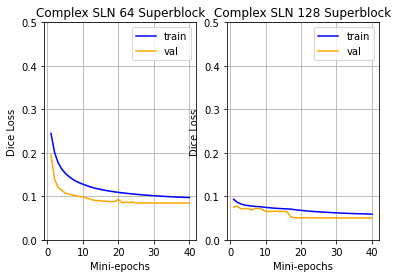

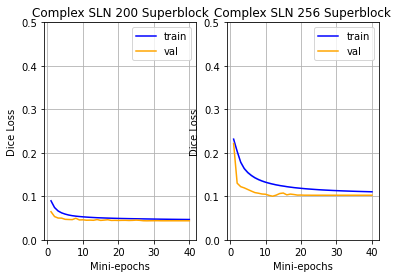

In [24]:
print("configuring combined plots")
domain = len(train_scores1)
x_values = [i+1 for i in range(domain)]
             
a1 = plt.subplot(1,2,1)
a1.set_ylim([0, 0.5])
plt.title("Complex SLN 64 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores1, train_var_1)]
ziptraindown = [a - b for a, b in zip(train_scores1, train_var_1)]
zipvalup = [a + b for a, b in zip(val_scores1, val_var_1)]
zipvaldown = [a - b for a, b in zip(val_scores1, val_var_1)]

plt.plot(x_values, train_scores1, color="blue", label="train")
a1.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores1, color="orange", label="val")
a1.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

a2 = plt.subplot(1,2,2)
a2.set_ylim([0, 0.5])
plt.title("Complex SLN 128 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores2, train_var_2)]
ziptraindown = [a - b for a, b in zip(train_scores2, train_var_2)]
zipvalup = [a + b for a, b in zip(val_scores2, val_var_2)]
zipvaldown = [a - b for a, b in zip(val_scores2, val_var_2)]

plt.plot(x_values, train_scores2, color="blue", label="train")
a2.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores2, color="orange", label="val")
a2.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

plt.show()

a3 = plt.subplot(1,2,1)
a3.set_ylim([0, 0.5])
plt.title("Complex SLN 200 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores3, train_var_3)]
ziptraindown = [a - b for a, b in zip(train_scores3, train_var_3)]
zipvalup = [a + b for a, b in zip(val_scores3, val_var_3)]
zipvaldown = [a - b for a, b in zip(val_scores3, val_var_3)]

plt.plot(x_values, train_scores3, color="blue", label="train")
a3.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores3, color="orange", label="val")
a3.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

a4 = plt.subplot(1,2,2)
a4.set_ylim([0, 0.5])
plt.title("Complex SLN 256 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores4, train_var_4)]
ziptraindown = [a - b for a, b in zip(train_scores4, train_var_4)]
zipvalup = [a + b for a, b in zip(val_scores4, val_var_4)]
zipvaldown = [a - b for a, b in zip(val_scores4, val_var_4)]

plt.plot(x_values, train_scores4, color="blue", label="train")
a4.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores4, color="orange", label="val")
a4.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

plt.show()

plt.close()